In [67]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
# 경로 변수 (고정)


trainfile = '../_data/train_03_997.csv'
old_trainfile = '../_data/train.csv'
kaggle_trainfile = '../_data/train_k.csv'

testfile = '../_data/test_clean.csv'
old_testfile = '../_data/test.csv'

train_171016 = '../_data/171016_dow_hr_pas_L2_dur_only.csv'
train_osrm = '../_data/train_with_osrm.csv'
train_osrm_weather = '../_data/train_with_osrm_and_weather.csv'
train_osrm_weather_hourly = '../_data/train_with_osrm_and_weather_hourly.csv'
train_dropped_nan_fixed = '../_data/train__dropped__no_disaster_nan_fixed.csv'
train_added_airps = '../_data/train__dropped__lnglat_saved__airports__no_disaster.csv'
train_added_airps_cleaned = '../_data/train__dropped__cleaned__airports__no_disaster.csv'
train_added_airps_disas_cleaned = '../_data/train__dropped__cleaned__eval__airports__disaster.csv'
train_added_weekhr = '../_data/train__dropped__cleaned__eval__a_d_weekhour.csv'
train_added_manh = '../_data/train__dropped__air_bliz_weekhr_manh.csv'
train_all_vars_rough = '../_data/train__all_vars__rough.csv'

train_701778_all_vars = '../_data/train__701778__all_vars.csv'
train_700806_all_vars_cooks_dropped = '../_data/train_700806_dropped_cooks.csv'
train_700789_all_vars_cooks_dropped_circle_filter = '../_data/train_700789_dropped_cooks__circle_filter.csv'
train_700789_all_vars_cdcf_kmeans = '../_data/train_kmeans_30_added.csv'
train_700419_all_vars_cdcf150kmh_km60 = '../_data/train_kmeans_60_added_cooksd_circle_150kmh.csv'

train_700419_all_vars_4d_clust120 = '../_data/train_kmeans_4D_120.csv'
train_700419_all_vars_4d_clust120_speed = '../_data/train_kmeans_4D_120_clustspeed.csv'
train_700419_all_vars_4d_clust120_speed_glob = '../_data/train_kmeans_4D_120_clustspeed_globalized.csv'

train_700419 = '../_data/train_700419_recent.csv'
train_700419 = '../_data/train_700419_recent_2047.csv'
train_697355 = '../_data/train_697355_rsq_0722.csv'
train_697349 = '../_data/train_697349_rsq_0723.csv'
train_697284 = '../_data/train_697284_rsq_0725.csv'
train_696688 = '../_data/train_696688_rsq_0731.csv'

test_recent = '../_data/test_recent_2048.csv'
test_recent = '../_data/test_recent_10150717.csv'

trains = [train_700419, train_697355, train_697349, train_697284, train_696688]


train_recent = trains[0]



In [2]:
pd.options.display.max_columns = 40

In [3]:
# train recent
df_train = pd.read_csv(train_recent)
df_train.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0
1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0
2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0
3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0
4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0


In [7]:
# test recent
df_test = pd.read_csv(test_recent)
df_test.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,...,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,0.0,False,0.0,630,Thursday,23,58,45,17.343755,False,...,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
1,0.0,False,0.0,630,Thursday,23,22,6,19.795471,False,...,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
2,0.0,False,0.0,630,Thursday,23,36,6,20.224880,False,...,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
3,0.0,False,0.0,630,Thursday,23,3,31,40.972632,False,...,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
4,0.0,False,0.0,630,Thursday,23,53,56,15.825632,False,...,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0


In [7]:
# df of results
df_res = pd.read_csv('../_data/OLS_result_variables_unique_with_restr_171024_1507.csv')
df_res = df_res.tail()
df_res

,formula,desc,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
8,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, clust_spd with means, log time,...",700419.0,0.701208,45660.575994,0.0,757875.481676,758299.480734,3.446769e+06,0.0,0.516736,13.818326,106.364487
9,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",697355.0,0.722529,51883.673856,0.0,680320.051067,680732.432863,1.051437e+06,0.0,0.608973,8.890892,107.983126
10,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",697349.0,0.723376,52103.264707,0.0,678258.040967,678670.422453,9.006055e+05,0.0,0.577827,8.446077,107.996783
11,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",697284.0,0.725532,52663.908834,0.0,672780.197744,673192.575874,7.351040e+05,0.0,0.526259,7.918734,108.034106
12,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow)...,"log dur, hr^3, new_clust_spd, log total_time, ...",696688.0,0.731000,54093.312934,0.0,649597.340000,650009.687347,3.894761e+05,0.0,0.382307,6.582222,108.378739


In [9]:
df_res.iloc[0, 2]

700419.0

In [49]:
df_res

,formula,desc,nobs,rsquared_adj,fvalue,f_pvalue,aic,bic,JB,JB-pval,skew,kurt,condition_number
8,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move),"log dur, hr^3, clust_spd with means, log time, didnt_move",700419.0,0.701208,45660.575994,0.0,757875.481676,758299.480734,3.446769e+06,0.0,0.516736,13.818326,106.364487
9,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / dist<=100, dur>=900 / spd>100, dur<=20",697355.0,0.722529,51883.673856,0.0,680320.051067,680732.432863,1.051437e+06,0.0,0.608973,8.890892,107.983126
10,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / dist<=50, dur>=600 / spd>100, dur<=20",697349.0,0.723376,52103.264707,0.0,678258.040967,678670.422453,9.006055e+05,0.0,0.577827,8.446077,107.996783
11,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / dist<=50, dur>=300 / spd>100, dur<=20",697284.0,0.725532,52663.908834,0.0,672780.197744,673192.575874,7.351040e+05,0.0,0.526259,7.918734,108.034106
12,np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp),"log dur, hr^3, new_clust_spd, log total_time, restr: dist=0 / spd<0.3 / spd>100, dur<=20",696688.0,0.731000,54093.312934,0.0,649597.340000,650009.687347,3.894761e+05,0.0,0.382307,6.582222,108.378739


In [46]:
# for idx in range(1, 5):
#     df_res.iloc[idx, 0] = df_res.iloc[idx, 0][:-16]
#     print(df_res.iloc[idx, 0])

In [15]:
fmla = 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)'

In [16]:
fmla

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)'

In [14]:
mod = sm.OLS.from_formula(fmla, data=df_train)
print('m')

m


In [15]:
res = mod.fit()

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(I(dur + 1))   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 4.572e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:54:07   Log-Likelihood:            -3.7856e+05
No. Observations:              700419   AIC:                         7.572e+05
Df Residuals:                  700382   BIC:                         7.576e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.4772      0.001   5138.522      0.000       6.475       6.480
C(is_hol)[T.True]                      -0.1241      0.004    -34.661      0.000      -0.131      -0.117
C(dow)[T.Monday]                       -0.0937      0.002    -49.051      0.000      -0.097      -0.090
C(dow)[T.Saturday]                     -0.1020      0.002    -57.011      0.000      -0.105      -0.098
C(dow)[T.Sunday]                       -0.2038      0.002   -107.309      0.000      -0.208      -0.200
C(dow)[T.Thursday]                      0.0074      0.002      4.100      0.000       0.004       0.011
C(dow)[T.Tuesday]                      -0.0293      0.002    -15.687      0.000      -0.033      -0.026
C(dow)[T.Wednesday]                    -0.0127      0.002     -6.924      0.000      -0.016      -0.009
C(p_LGA)[T.True]                        0.0338      0.003      9.810      0.000       0.027       0.040
C(d_JFK)[T.True]                        0.0503      0.007      7.250      0.000       0.037       0.064
C(d_LGA)[T.True]                       -0.0810      0.005    -15.896      0.000      -0.091      -0.071
C(didnt_move)[T.1.0]                    3.5620      0.009    395.542      0.000       3.544       3.580
C(dow)[Friday]:scale(hr)                0.3055      0.011     27.895      0.000       0.284       0.327
C(dow)[Monday]:scale(hr)                0.4976      0.014     35.157      0.000       0.470       0.525
C(dow)[Saturday]:scale(hr)             -0.4080      0.011    -37.339      0.000      -0.429      -0.387
C(dow)[Sunday]:scale(hr)               -0.5989      0.012    -50.185      0.000      -0.622      -0.576
C(dow)[Thursday]:scale(hr)              0.4798      0.012     38.768      0.000       0.456       0.504
C(dow)[Tuesday]:scale(hr)               0.5677      0.014     40.894      0.000       0.540       0.595
C(dow)[Wednesday]:scale(hr)             0.4922      0.013     37.611      0.000       0.467       0.518
C(dow)[Friday]:scale(I(hr ** 2))       -0.0445      0.028     -1.615      0.106      -0.098       0.009
C(dow)[Monday]:scale(I(hr ** 2))       -0.3231      0.034     -9.577      0.000      -0.389      -0.257
C(dow)[Saturday]:scale(I(hr ** 2))      1.4350      0.029     50.086      0.000       1.379       1.491
C(dow)[Sunday]:scale(I(hr ** 2))        1.9556      0.032     60.905      0.000       1.893       2.018
C(dow)[Thursday]:scale(I(hr ** 2))     -0.1620      0.030     -5.416      0.000      -0.221      -0.103
C(dow)[Tuesday]:scale(I(hr ** 2))      -0.3108      0.033     -9.513      0.000      -0.375      -0.247
C(dow)[Wednesday]:scale(I(hr ** 2))    -0.1404      0.031     -4.486      0.000      -0.202      -0.079
C(dow)[Friday]:scale(I(hr ** 3))       -0.2360      0.018    -13.26

In [4]:
def get_date_rowrange(df, d1, d2):
    top = df[(df['m_d'] >= d1)
                   &(df['m_d'] < d2)].iloc[0, :].name
    bot = df[(df['m_d'] >= d1)
                   &(df['m_d'] < d2)].iloc[-1, :].name
    return top, bot

def get_month_rowranges(df):
    month_ranges = dict()

    months = [101, 201, 301, 401, 501, 601]

    for idx, month in enumerate(months):
        try:
            month_ranges[idx+1] = get_date_rowrange(df, month, month+100)
        except:
            continue
    return month_ranges

print(get_date_rowrange(df_train, 115, 211))
get_month_rowranges(df_train)


(478461, 625075)


{1: (535649, 700418), 2: (364370, 535648), 3: (180591, 364369), 4: (0, 180590)}

In [9]:
df_train.shape

(700419, 31)

In [10]:
df_train[(df_train['m_d'] >= 401)
                   &(df_train['m_d'] < 501)]

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,...,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0
1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0
2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0
3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0
4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0
5,0.0,False,0.0,430,Saturday,23,58,53,18.958321,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1619.0
6,0.0,False,0.0,430,Saturday,23,73,6,25.197771,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,2209.0
7,0.0,False,0.0,430,Saturday,23,3,56,31.012277,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,2458.0
8,0.0,False,0.0,430,Saturday,23,15,31,38.858562,False,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1584.0
9,0.0,False,0.0,430,Saturday,23,2,34,32.908408,True,...,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,2337.0


In [12]:
get_date_rowrange(df_train, 401, 501)[1] - get_date_rowrange(df_train, 401, 501)[0] + 1

180591

In [ ]:
    test_indices = random.sample(range(test_start, test_end+1),\
                                  k=test_size)

In [5]:
import random

def train_test_date_samples(X, y, train_size=None,\
                            test_size=None,\
                            train_range=(101, 401),
                            test_range=(401, 501)):
    train_start, train_end = get_date_rowrange(X, *train_range)
    test_start, test_end = get_date_rowrange(X, *test_range)

    train_cnt = train_end - train_start + 1
    test_cnt = test_end - test_start + 1
    
    if not train_size or train_size > train_cnt:
        train_size = train_cnt
    if not test_size or test_size > test_cnt:
        test_size = test_cnt
    
    train_indices = random.sample(range(train_start, train_end+1),\
                                  k=train_size)
    test_indices = random.sample(range(test_start, test_end+1),\
                                  k=test_size)
    
    print("test_size: {}\ntrain_size: {}".format(test_size, train_size))
    print("test / (train + test) = {}".format(test_size / (train_size + test_size)))
        
    return X.loc[train_indices, :], X.loc[test_indices, :],\
           y.loc[train_indices], y.loc[test_indices]

    

X, y = df_train.iloc[:, :-1], df_train.iloc[:, -1]
    
a, b, c, d = train_test_date_samples(X, y)


test_size: 180591
train_size: 519828
test / (train + test) = 0.257832811502829


In [64]:
df_train = pd.read_csv('../_data/train_700419_recent_2047.csv')
df_train.shape

(700419, 31)

In [14]:
df_trainz = df_train.copy()

In [6]:
def poly_string(deg, scale_=True):    
    var_ = 'hr'
    poly_sum = 'C(dow):scale({})'.format(var_) if scale_ else 'C(dow):{}'.format(var_)
    for pwr in range(2, deg+1):
        nth_deg = ' + C(dow):scale(I({}**{}))'.format(var_, pwr) if scale_\
                  else ' + C(dow):I({}**{})'.format(var_, pwr)
        poly_sum += nth_deg
    return poly_sum

print(poly_string(6, True))
print(poly_string(4, False))

C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(dow):scale(I(hr**4)) + C(dow):scale(I(hr**5)) + C(dow):scale(I(hr**6))
C(dow):hr + C(dow):I(hr**2) + C(dow):I(hr**3) + C(dow):I(hr**4)


In [7]:
def poly_C_string(deg, scale_=True):    
    var_ = 'hr'
    poly_sum = 'C(didnt_move):C(dow):scale({})'.format(var_) if scale_\
    else 'C(didnt_move):C(dow):{}'.format(var_)
    
    for pwr in range(2, deg+1):
        nth_deg = ' + C(didnt_move):C(dow):scale(I({}**{}))'.format(var_, pwr) if scale_\
                  else ' + C(didnt_move):C(dow):I({}**{})'.format(var_, pwr)
        poly_sum += nth_deg
    return poly_sum

print(poly_C_string(6, True))
print(poly_C_string(4, False))

C(didnt_move):C(dow):scale(hr) + C(didnt_move):C(dow):scale(I(hr**2)) + C(didnt_move):C(dow):scale(I(hr**3)) + C(didnt_move):C(dow):scale(I(hr**4)) + C(didnt_move):C(dow):scale(I(hr**5)) + C(didnt_move):C(dow):scale(I(hr**6))
C(didnt_move):C(dow):hr + C(didnt_move):C(dow):I(hr**2) + C(didnt_move):C(dow):I(hr**3) + C(didnt_move):C(dow):I(hr**4)


In [33]:
def get_fmla_old(hr_deg):
    return 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + '\
         + poly_string(hr_deg)\
         + ' + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd)'\
         + ' + scale(np.log(I(total_time+1))) + scale(day_snowdepth)'\
         + ' + scale(hr_temp) + C(didnt_move)'
        
get_fmla(7)

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(dow):scale(I(hr**4)) + C(dow):scale(I(hr**5)) + C(dow):scale(I(hr**6)) + C(dow):scale(I(hr**7)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)'

In [8]:
def get_fmla(hr_deg):
    return 'np.log(I(dur+1)) ~ C(didnt_move):C(is_hol) + C(didnt_move):C(dow) + '\
         + poly_C_string(hr_deg)\
         + ' + C(didnt_move):C(p_LGA) + C(didnt_move):C(d_JFK) + C(didnt_move):C(d_LGA) + C(didnt_move):scale(clust_spd)'\
         + ' + C(didnt_move):scale(np.log(I(total_time+1))) + C(didnt_move):scale(day_snowdepth)'\
         + ' + C(didnt_move):scale(hr_temp) + C(didnt_move)'
        
get_fmla(7)

'np.log(I(dur+1)) ~ C(didnt_move):C(is_hol) + C(didnt_move):C(dow) + C(didnt_move):C(dow):scale(hr) + C(didnt_move):C(dow):scale(I(hr**2)) + C(didnt_move):C(dow):scale(I(hr**3)) + C(didnt_move):C(dow):scale(I(hr**4)) + C(didnt_move):C(dow):scale(I(hr**5)) + C(didnt_move):C(dow):scale(I(hr**6)) + C(didnt_move):C(dow):scale(I(hr**7)) + C(didnt_move):C(p_LGA) + C(didnt_move):C(d_JFK) + C(didnt_move):C(d_LGA) + C(didnt_move):scale(clust_spd) + C(didnt_move):scale(np.log(I(total_time+1))) + C(didnt_move):scale(day_snowdepth) + C(didnt_move):scale(hr_temp) + C(didnt_move)'

In [10]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

from datetime import datetime

def run_cv(hr_deg, df, n=3):
    t0 = datetime.now()
    print(t0)

    fmla = get_fmla(hr_deg)
    df = df
    scores = np.zeros(n)

    print("Train has {} rows".format(df.shape[0]))
    print("Test has {} rows".format(df.shape[0]))
    print("formula = {}\n".format(fmla))

    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_date_samples(df.iloc[:, :-1], df.iloc[:, -1],\
                                                                    train_size=200000,\
                                                                    test_size=50000,\
                                                                    train_range=(101, 401),\
                                                                    test_range=(401, 501))
        df_train__ = pd.concat([X_train, y_train], axis=1)

        print("------trial {}------".format(i+1))
        model_train = sm.OLS.from_formula(fmla, data=df_train__)
        res_train = model_train.fit()

        y_pred = res_train.predict(X_test)
        y_pred = np.exp(y_pred)

        try:
            scores[i] = mean_squared_log_error(y_test, y_pred)
            print(pd.concat([y_test, y_pred], axis=1).head(5))
            print(np.sqrt(scores))
        except:
            print("except")
            print(df.shape)
            print(y_test[y_test<=0].shape)
            print(y_pred[y_pred<=0].shape)
            break

    scores = np.sqrt(scores)
    print(scores)

    t1 = datetime.now()
    print(t1)
    print(t1 - t0)
    print()
    print()
    return scores

In [21]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

from datetime import datetime

def run_cv_reg(hr_deg, df, alpha, n=3):
    t0 = datetime.now()
    print(t0)

    fmla = get_fmla(hr_deg)
    df = df
    scores = np.zeros(n)

    print("Train has {} rows".format(df.shape[0]))
    print("Test has {} rows".format(df.shape[0]))
    print("formula = {}\n".format(fmla))

    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_date_samples(df.iloc[:, :-1], df.iloc[:, -1],\
                                                                    train_size=100000,\
                                                                    test_size=50000,\
                                                                    train_range=(101, 401),\
                                                                    test_range=(401, 501))
        df_train__ = pd.concat([X_train, y_train], axis=1)

        print("------trial {}------".format(i+1))
        model_train = sm.OLS.from_formula(fmla, data=df_train__)
        res_train = model_train.fit_regularized(alpha=alpha, L1_wt=1.0)

        y_pred = res_train.predict(X_test)
        y_pred = np.exp(y_pred)

        try:
            scores[i] = mean_squared_log_error(y_test, y_pred)
            print(pd.concat([y_test, y_pred], axis=1).head(5))
            print(np.sqrt(scores))
        except:
            print("except")
            print(df.shape)
            print(y_test[y_test<=0].shape)
            print(y_pred[y_pred<=0].shape)
            break

    scores = np.sqrt(scores)
    print(scores)

    t1 = datetime.now()
    print(t1)
    print(t1 - t0)
    print()
    print()
    return scores

In [17]:
np.logspace(-3, 2, 6)

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02])

In [31]:
scoreses = dict()
n = 5

S = dict()

for deg in range(3, 10):
    scoreses = dict()
    for alpha in np.logspace(-3, 1, 5):
        print('='*25 + 'RUNNING DEGREE {}, ALPHA {}'.format(deg, alpha) + '='*25)
        scores = run_cv_reg(deg, df_train, alpha, n)
        scoreses[alpha] = scores
    S[deg] = scoreses


=========================RUNNING DEGREE 3, ALPHA 0.001=========================
2017-10-25 08:53:09.398007
Train has 700419 rows
Test has 700419 rows
formula = np.log(I(dur+1)) ~ C(didnt_move):C(is_hol) + C(didnt_move):C(dow) + C(didnt_move):C(dow):scale(hr) + C(didnt_move):C(dow):scale(I(hr**2)) + C(didnt_move):C(dow):scale(I(hr**3)) + C(didnt_move):C(p_LGA) + C(didnt_move):C(d_JFK) + C(didnt_move):C(d_LGA) + C(didnt_move):scale(clust_spd) + C(didnt_move):scale(np.log(I(total_time+1))) + C(didnt_move):scale(day_snowdepth) + C(didnt_move):scale(hr_temp) + C(didnt_move)

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 1------
           dur           0
57818   1010.0  937.141629
133048   682.0  446.537322
166517   574.0  381.271861
132624   415.0  486.845880
80306   1224.0  865.259839
[ 0.43308634  0.          0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 2------
 

------trial 3------
          dur           0
69450   166.0  228.043785
43781   805.0  228.043785
154755  615.0  228.043785
51570   804.0  228.043785
33133   765.0  228.043785
[ 1.30256443  1.29635034  1.29693996  0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 4------
           dur          0
77273    951.0  226.74575
60843   2303.0  226.74575
18199    693.0  226.74575
173363   434.0  226.74575
76304    473.0  226.74575
[ 1.30256443  1.29635034  1.29693996  1.30331959  0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 5------
           dur           0
126798   321.0  228.113016
44573   1379.0  228.113016
132750   938.0  228.113016
151026   517.0  228.113016
114318   819.0  228.113016
[ 1.30256443  1.29635034  1.29693996  1.30331959  1.29369145]
[ 1.30256443  1.29635034  1.29693996  1.30331959  1.29369145]
2017-10-25 08:56:35.906196
0:00:41.145440


================

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 1------
          dur            0
35121  1246.0  1094.886931
16503   494.0   671.840594
13003   707.0   343.609092
5181   1206.0  1128.820419
71075   842.0   667.216328
[ 0.49651315  0.          0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 2------
           dur           0
176016  1698.0  929.921381
96346   1373.0  707.804690
124991   522.0  574.823844
28965    501.0  420.588847
702      989.0  801.542343
[ 0.49651315  0.4943823   0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 3------
          dur           0
50614   140.0  172.834147
73342   889.0  590.987425
145279  374.0  309.312471
90327   980.0  511.031678
123771  812.0  777.058564
[ 0.49651315  0.4943823   0.49771606  0.          0.        ]
test_size: 50000
train_size: 100000
t

------trial 5------
          dur           0
36769   292.0  402.607220
126427  144.0  313.690534
56075   724.0  475.572522
177454  401.0  431.095317
163281  398.0  424.868019
[ 0.42696624  0.42884808  0.43446372  0.42846794  0.42604295]
[ 0.42696624  0.42884808  0.43446372  0.42846794  0.42604295]
2017-10-25 09:04:08.628443
0:01:55.134336


=========================RUNNING DEGREE 5, ALPHA 0.01=========================
2017-10-25 09:04:08.650501
Train has 700419 rows
Test has 700419 rows
formula = np.log(I(dur+1)) ~ C(didnt_move):C(is_hol) + C(didnt_move):C(dow) + C(didnt_move):C(dow):scale(hr) + C(didnt_move):C(dow):scale(I(hr**2)) + C(didnt_move):C(dow):scale(I(hr**3)) + C(didnt_move):C(dow):scale(I(hr**4)) + C(didnt_move):C(dow):scale(I(hr**5)) + C(didnt_move):C(p_LGA) + C(didnt_move):C(d_JFK) + C(didnt_move):C(d_LGA) + C(didnt_move):scale(clust_spd) + C(didnt_move):scale(np.log(I(total_time+1))) + C(didnt_move):scale(day_snowdepth) + C(didnt_move):scale(hr_temp) + C(didnt_move)

te

           dur    0
171985   619.0  1.0
87151    726.0  1.0
133744  3528.0  1.0
158185   215.0  1.0
167193  1649.0  1.0
[ 5.83587062  0.          0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 2------
           dur    0
748     1504.0  1.0
49785   1872.0  1.0
102640   700.0  1.0
167786   793.0  1.0
148306  1483.0  1.0
[ 5.83587062  5.83380279  0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 3------
          dur    0
166001  439.0  1.0
66987   790.0  1.0
20814   339.0  1.0
128123  591.0  1.0
73078   315.0  1.0
[ 5.83587062  5.83380279  5.82910535  0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 4------
           dur    0
165579  1124.0  1.0
129175  1402.0  1.0
24906    207.0  1.0
44125    614.0  1.0
80101    320.0  1.0
[ 5.83587062  5.83380279  5.82910535  5.834

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 5------
           dur            0
44803   1715.0  1617.952368
77705   1333.0  1058.918229
62753   1625.0   498.052746
23661    461.0   400.112582
146552  1017.0   719.974225
[ 0.49504403  0.50084769  0.50119805  0.49935753  0.4947701 ]
[ 0.49504403  0.50084769  0.50119805  0.49935753  0.4947701 ]
2017-10-25 09:12:07.903867
0:01:00.955897


=========================RUNNING DEGREE 6, ALPHA 1.0=========================
2017-10-25 09:12:07.927932
Train has 700419 rows
Test has 700419 rows
formula = np.log(I(dur+1)) ~ C(didnt_move):C(is_hol) + C(didnt_move):C(dow) + C(didnt_move):C(dow):scale(hr) + C(didnt_move):C(dow):scale(I(hr**2)) + C(didnt_move):C(dow):scale(I(hr**3)) + C(didnt_move):C(dow):scale(I(hr**4)) + C(didnt_move):C(dow):scale(I(hr**5)) + C(didnt_move):C(dow):scale(I(hr**6)) + C(didnt_move):C(p_LGA) + C(didnt_move):C(d_JFK) + C(didnt_move):C(d_LGA) + C(didnt_move):scale(clust_spd) + C(d

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 1------
          dur           0
6047    658.0  708.575871
175382  192.0  354.622186
40523   553.0  436.741533
84781   669.0  579.664953
41119   291.0  432.852233
[ 0.45129002  0.          0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 2------
           dur            0
76179   1080.0   794.131237
129486   541.0   565.632768
128916  1570.0  1989.831004
64409     76.0   160.074104
114870  2281.0  1791.934384
[ 0.45129002  0.44791729  0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 3------
           dur            0
64160    263.0   399.393019
50222    610.0   520.601722
142167  2563.0  1599.929317
81848   1103.0  1016.762672
174658   428.0   530.141019
[ 0.45129002  0.44791729  0.45341635  0.          0.        ]
test_size: 50000
train_si

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 4------
           dur    0
151053   251.0  1.0
98836   1602.0  1.0
136055   798.0  1.0
78676    184.0  1.0
162661  1031.0  1.0
[ 5.83420935  5.83182558  5.82825588  5.83941825  0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 5------
           dur    0
46160    576.0  1.0
38601    475.0  1.0
171385  1548.0  1.0
163698   229.0  1.0
39553    570.0  1.0
[ 5.83420935  5.83182558  5.82825588  5.83941825  5.83327298]
[ 5.83420935  5.83182558  5.82825588  5.83941825  5.83327298]
2017-10-25 09:22:04.841247
0:01:04.223885


=========================RUNNING DEGREE 8, ALPHA 0.001=========================
2017-10-25 09:22:04.867314
Train has 700419 rows
Test has 700419 rows
formula = np.log(I(dur+1)) ~ C(didnt_move):C(is_hol) + C(didnt_move):C(dow) + C(didnt_move):C(dow):scale(hr) + C(didnt_move):C(dow):scale(I(hr**2)) + C(didnt_move):C(dow):scale(I(hr*

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 1------
           dur           0
100921   388.0  227.041642
131394  1180.0  227.041642
721      378.0  227.041642
76314   1194.0  227.041642
51705    832.0  227.041642
[ 1.30034824  0.          0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 2------
           dur           0
144338   828.0  227.013238
110052   957.0  227.013238
142283  2339.0  227.013238
9965     461.0  227.013238
88676    429.0  227.013238
[ 1.30034824  1.30079886  0.          0.          0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 3------
           dur           0
49007    415.0  227.379914
70864    593.0  227.379914
173013  1218.0  227.379914
59913    623.0  227.379914
89818    995.0  227.379914
[ 1.30034824  1.30079886  1.30214145  0.          0.        ]
test_size: 50000
train_size: 10

test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 4------
           dur            0
109054   843.0   506.611208
54674    771.0   573.257248
43209   1946.0  1626.725299
178333   580.0   529.632031
87060    114.0    63.070939
[ 0.45050785  0.44584106  0.4551164   0.45203807  0.        ]
test_size: 50000
train_size: 100000
test / (train + test) = 0.3333333333333333
------trial 5------
           dur            0
4690     322.0   419.278271
72258   1785.0  1108.156250
33126    336.0   384.100419
103544  1107.0   573.878720
26316    825.0   329.496687
[ 0.45050785  0.44584106  0.4551164   0.45203807  0.44940625]
[ 0.45050785  0.44584106  0.4551164   0.45203807  0.44940625]
2017-10-25 09:35:23.190425
0:01:56.448986


=========================RUNNING DEGREE 9, ALPHA 0.1=========================
2017-10-25 09:35:23.216494
Train has 700419 rows
Test has 700419 rows
formula = np.log(I(dur+1)) ~ C(didnt_move):C(is_hol) + C(didnt_move):C(dow) + C(didnt_mo

In [ ]:
for scoreses in S:
    for k in scoreses.keys():
        scoreses[k][scoreses[k]==0.0] = np.nan

In [58]:
list(scoreses.keys())

[1, 2, 3, 4, 5, 6]

In [36]:
x = list(S.keys())
x

[3, 4, 5, 6, 7, 8, 9]

In [37]:
y = list(S[3].keys())
y

[0.001, 0.01, 0.10000000000000001, 1.0, 10.0]

In [39]:
S1 = S.copy()

In [46]:
S1[3].keys()

dict_keys([0.001, 0.01, 0.10000000000000001, 1.0, 10.0])

In [47]:
for deg in S1.keys():
    for alpha in S1[deg].keys():
        S1[deg][alpha] = np.mean(S1[deg][alpha])


In [48]:
S1

{3: {0.001: 0.43107966860982677,
  0.01: 0.45350822260954737,
  0.10000000000000001: 0.49500721708551881,
  1.0: 1.298573155600167,
  10.0: 5.8343432609680566},
 4: {0.001: 0.43018388079856973,
  0.01: 0.45151007823385819,
  0.10000000000000001: 0.49694943848541523,
  1.0: 1.298837095908032,
  10.0: 5.8317901478567267},
 5: {0.001: 0.4289577872071561,
  0.01: 0.45278159300942827,
  0.10000000000000001: 0.49634936650548855,
  1.0: 1.2978344490771057,
  10.0: 5.8338843378925462},
 6: {0.001: 0.42854579965315426,
  0.01: 0.45234035158963276,
  0.10000000000000001: 0.4982434771194032,
  1.0: 1.2973681528918455,
  10.0: 5.8330474517760251},
 7: {0.001: 0.42937408625174633,
  0.01: 0.45314065621040339,
  0.10000000000000001: 0.49651019493435616,
  1.0: 1.3005907425694514,
  10.0: 5.8333964054576803},
 8: {0.001: 0.42704283865269943,
  0.01: 0.45176921680189974,
  0.10000000000000001: 0.49732425002855196,
  1.0: 1.3005499574763852,
  10.0: 5.8325918113389363},
 9: {0.001: 0.42652754108221175,

In [62]:
df_res = pd.DataFrame(S1)
df_res

,3,4,5,6,7,8,9
0.001,0.431080,0.430184,0.428958,0.428546,0.429374,0.427043,0.426528
0.010,0.453508,0.451510,0.452782,0.452340,0.453141,0.451769,0.450582
0.100,0.495007,0.496949,0.496349,0.498243,0.496510,0.497324,0.497304
1.000,1.298573,1.298837,1.297834,1.297368,1.300591,1.300550,1.297289
10.000,5.834343,5.831790,5.833884,5.833047,5.833396,5.832592,5.835387


In [53]:
df_res = np.log(df_res)
df_res

,3,4,5,6,7,8,9
0.001,-0.841462,-0.843543,-0.846397,-0.847358,-0.845427,-0.850871,-0.852078
0.010,-0.790742,-0.795158,-0.792345,-0.793320,-0.791553,-0.794584,-0.797215
0.100,-0.703183,-0.699267,-0.700475,-0.696666,-0.700151,-0.698513,-0.698554
1.000,0.261266,0.261469,0.260697,0.260338,0.262819,0.262787,0.260277
10.000,1.763762,1.763324,1.763683,1.763540,1.763599,1.763461,1.763941


In [67]:
df_res.to_csv('../_data/pres_gridsearch.csv', index_label='alpha')

In [59]:
df_res1 = df_res.iloc[0:3, :].copy()
df_res1

,3,4,5,6,7,8,9
0.001,-0.841462,-0.843543,-0.846397,-0.847358,-0.845427,-0.850871,-0.852078
0.010,-0.790742,-0.795158,-0.792345,-0.793320,-0.791553,-0.794584,-0.797215
0.100,-0.703183,-0.699267,-0.700475,-0.696666,-0.700151,-0.698513,-0.698554


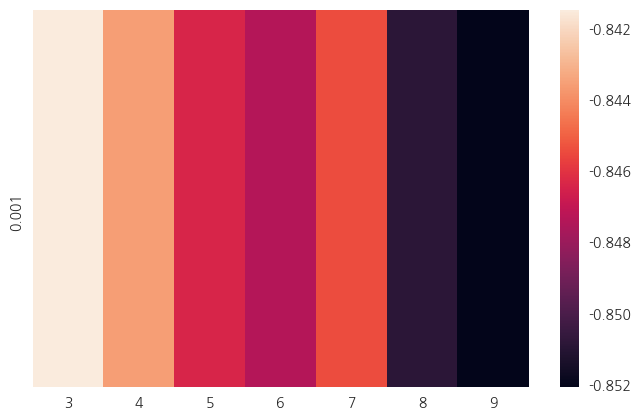

In [61]:
plt.ylabel = 'alpha'
plt.xlabel = 'degree of hr'
sns.heatmap(df_res1.iloc[0:1, :])

plt.show()

In [26]:
np.log10(list(scoreses.keys()))

array([ 0.60205999])

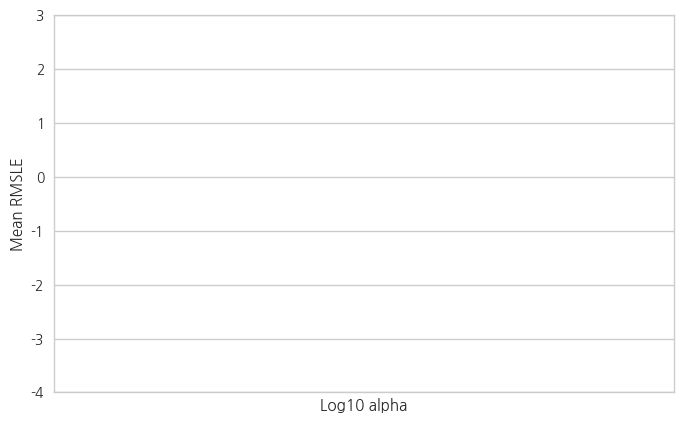

In [25]:

plt.bar(list(scoreses.keys()), [np.mean(scoreses[i]) for i in scoreses.keys()])
plt.xlim(0, max(np.log10(list(scoreses.keys())))+1)
plt.ylim(-4, 3)
plt.gca().xaxis.grid(False)
plt.xticks(list(scoreses.keys()))

plt.ylabel("Mean RMSLE")
plt.xlabel("Log10 alpha")
plt.show()



In [21]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

from datetime import datetime

t00 = datetime.now()
print(t00)

n = 3

t0 = datetime.now()
print(t0)

fmla = 'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr)\
+ C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3))\
+ C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd)\
+ scale(np.log(I(total_time+1))) + scale(day_snowdepth)\
+ scale(hr_temp) + C(didnt_move)'
df = df_train
scores = np.zeros(n)

print("Train has {} rows".format(df.shape[0]))
print("Test has {} rows".format(df.shape[0]))
print("formula = {}\n".format(fmla))

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_date_samples(df.iloc[:, :-1], df.iloc[:, -1],\
                                                                train_size=200000,\
                                                                test_size=50000,\
                                                                train_range=(101, 201),\
                                                                test_range=(201, 501))
    df_train__ = pd.concat([X_train, y_train], axis=1)

    print("trial {}".format(i+1))
    model_train = sm.OLS.from_formula(fmla, data=df_train__)
    res_train = model_train.fit()

    y_pred = res_train.predict(X_test)

    y_pred = np.exp(y_pred)

    try:
        scores[i] = mean_squared_log_error(y_test, y_pred)
        print(pd.concat([y_test, y_pred], axis=1).head(5))
        print(np.sqrt(scores))
    except:
        print("except")
        print(df.shape)
        print(y_test[y_test<=0].shape)
        print(y_pred[y_pred<=0].shape)
        break

scores = np.sqrt(scores)
print(scores)

t1 = datetime.now()
print(t1)
print(t1 - t0)
print()
print()

    
t2 = datetime.now()
print(t2)
print(t2 - t00)

2017-10-25 07:30:05.199161
2017-10-25 07:30:05.200166
Train has 700419 rows
Test has 700419 rows
formula = np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr)+ C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3))+ C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd)+ scale(np.log(I(total_time+1))) + scale(day_snowdepth)+ scale(hr_temp) + C(didnt_move)

test / (train + test) = 0.23280718908599898
trial 1
           dur            0
384981  1692.0  1508.013000
158646   949.0   687.792941
449511   627.0   421.894271
458668   999.0   852.664127
192108   656.0   582.440609
[ 0.41749747  0.          0.        ]
test / (train + test) = 0.23280718908599898
trial 2
           dur            0
94405   1024.0   919.261433
476708  1473.0  1317.081747
114274   631.0   371.300814
10045   2879.0  2182.788518
222076   489.0   398.256659
[ 0.41749747  0.41816239  0.        ]
test / (train + test) = 0.23280718908599898
trial 3
           dur            0
2399    1847.0  1673.596203
131437   508.0   660.798

In [71]:
df_train.shape

(700419, 31)

In [72]:
fmla

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)'

In [73]:
mod = sm.OLS.from_formula(fmla, data=df_train)
res = mod.fit()

In [74]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(I(dur + 1))   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                 4.572e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:14:58   Log-Likelihood:            -3.7856e+05
No. Observations:              700419   AIC:                         7.572e+05
Df Residuals:                  700382   BIC:                         7.576e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.4772      0.001   5138.522      0.000       6.475       6.480
C(is_hol)[T.True]                      -0.1241      0.004    -34.661      0.000      -0.131      -0.117
C(dow)[T.Monday]                       -0.0937      0.002    -49.051      0.000      -0.097      -0.090
C(dow)[T.Saturday]                     -0.1020      0.002    -57.011      0.000      -0.105      -0.098
C(dow)[T.Sunday]                       -0.2038      0.002   -107.309      0.000      -0.208      -0.200
C(dow)[T.Thursday]                      0.0074      0.002      4.100      0.000       0.004       0.011
C(dow)[T.Tuesday]                      -0.0293      0.002    -15.687      0.000      -0.033      -0.026
C(dow)[T.Wednesday]                    -0.0127      0.002     -6.924      0.000      -0.016      -0.009
C(p_LGA)[T.True]                        0.0338      0.003      9.810      0.000       0.027       0.040
C(d_JFK)[T.True]                        0.0503      0.007      7.250      0.000       0.037       0.064
C(d_LGA)[T.True]                       -0.0810      0.005    -15.896      0.000      -0.091      -0.071
C(didnt_move)[T.1.0]                    3.5620      0.009    395.542      0.000       3.544       3.580
C(dow)[Friday]:scale(hr)                0.3055      0.011     27.895      0.000       0.284       0.327
C(dow)[Monday]:scale(hr)                0.4976      0.014     35.157      0.000       0.470       0.525
C(dow)[Saturday]:scale(hr)             -0.4080      0.011    -37.339      0.000      -0.429      -0.387
C(dow)[Sunday]:scale(hr)               -0.5989      0.012    -50.185      0.000      -0.622      -0.576
C(dow)[Thursday]:scale(hr)              0.4798      0.012     38.768      0.000       0.456       0.504
C(dow)[Tuesday]:scale(hr)               0.5677      0.014     40.894      0.000       0.540       0.595
C(dow)[Wednesday]:scale(hr)             0.4922      0.013     37.611      0.000       0.467       0.518
C(dow)[Friday]:scale(I(hr ** 2))       -0.0445      0.028     -1.615      0.106      -0.098       0.009
C(dow)[Monday]:scale(I(hr ** 2))       -0.3231      0.034     -9.577      0.000      -0.389      -0.257
C(dow)[Saturday]:scale(I(hr ** 2))      1.4350      0.029     50.086      0.000       1.379       1.491
C(dow)[Sunday]:scale(I(hr ** 2))        1.9556      0.032     60.905      0.000       1.893       2.018
C(dow)[Thursday]:scale(I(hr ** 2))     -0.1620      0.030     -5.416      0.000      -0.221      -0.103
C(dow)[Tuesday]:scale(I(hr ** 2))      -0.3108      0.033     -9.513      0.000      -0.375      -0.247
C(dow)[Wednesday]:scale(I(hr ** 2))    -0.1404      0.031     -4.486      0.000      -0.202      -0.079
C(dow)[Friday]:scale(I(hr ** 3))       -0.2360      0.018    -13.26

In [77]:
del df_test['dur']

In [78]:
df_test.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,0.0,False,0.0,630,Thursday,23,58,45,17.343755,False,False,False,False,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
1,0.0,False,0.0,630,Thursday,23,22,6,19.795471,False,False,False,False,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
2,0.0,False,0.0,630,Thursday,23,36,6,20.224880,False,False,False,False,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
3,0.0,False,0.0,630,Thursday,23,3,31,40.972632,False,True,False,False,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
4,0.0,False,0.0,630,Thursday,23,53,56,15.825632,False,False,False,False,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0


In [82]:
test_pred_log = res.predict(df_test)

In [83]:
test_pred = np.exp(test_pred_log)

In [84]:
test_pred.head()

0    1007.790371
1     408.912734
2    1850.600478
3    1382.675226
4     748.497554
dtype: float64

In [85]:
df_test_orig = pd.read_csv('../_data/test.csv')
df_test_orig.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2332349,2,6/30/16 23:59,5,-73.998291,40.722618,-73.971779,40.762470,N
1,id2013516,1,6/30/16 23:59,2,-73.955109,40.689564,-73.978203,40.685802,N
2,id3719493,2,6/30/16 23:59,1,-73.978416,40.791576,-73.973160,40.675968,N
3,id0376262,1,6/30/16 23:59,2,-73.873093,40.774097,-73.926704,40.856739,N
4,id2105228,1,6/30/16 23:58,1,-73.979416,40.755211,-74.003548,40.738224,N


In [86]:
df_test_orig.shape

(346797, 9)

In [87]:
test_pred.shape

(346797,)

In [88]:
df_final = pd.concat([df_test_orig['id'], test_pred], axis=1, names=['id', 'trip_duration'])

In [89]:
df_final

,id,0
0,id2332349,1007.790371
1,id2013516,408.912734
2,id3719493,1850.600478
3,id0376262,1382.675226
4,id2105228,748.497554
5,id1276841,571.839664
6,id3016059,409.326217
7,id3952659,674.618586
8,id1255468,446.025276
9,id3049611,407.534003


In [92]:
df_final.to_csv('../_data/submission_2120.csv', index=False)

In [93]:
df_final_backup = df_final

replace 0 dist values

In [96]:
df_raw = pd.read_csv('../_data/train__701778__all_vars.csv')
df_raw.head()

,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [105]:
avg_zero = df_raw.loc[df_raw['total_dist'] == 0, 'dur'].mean()
avg_zero

503.51274886482713

In [107]:
df_test['dur'] = test_pred

In [108]:
df_test.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,630,Thursday,23,58,45,17.343755,False,False,False,False,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,1007.790371
1,0.0,False,0.0,630,Thursday,23,22,6,19.795471,False,False,False,False,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,408.912734
2,0.0,False,0.0,630,Thursday,23,36,6,20.224880,False,False,False,False,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,1850.600478
3,0.0,False,0.0,630,Thursday,23,3,31,40.972632,False,True,False,False,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,1382.675226
4,0.0,False,0.0,630,Thursday,23,53,56,15.825632,False,False,False,False,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,748.497554


In [ ]:
'p_lng', 'p_lat', 'd_lng', 'd_lat'

In [110]:
df_test_small = df_test[['id', 'didnt_move', 'p_lng', 'p_lat', 'd_lng', 'd_lat', 'total_dist', 'dur']].copy()

In [114]:
df_test_small.loc[df_test_small['didnt_move'] == 1, 'dur'] = avg_zero

In [118]:
df_test_small.insert(0, 'id', df_test_orig['id'])
df_test_small.head()

,id,didnt_move,p_lng,p_lat,d_lng,d_lat,total_dist,dur
0,id2332349,0.0,-73.998291,40.722618,-73.971779,40.762470,5280.3,1007.790371
1,id2013516,0.0,-73.955109,40.689564,-73.978203,40.685802,2573.5,408.912734
2,id3719493,0.0,-73.978416,40.791576,-73.973160,40.675968,15048.8,1850.600478
3,id0376262,0.0,-73.873093,40.774097,-73.926704,40.856739,16818.3,1382.675226
4,id2105228,0.0,-73.979416,40.755211,-74.003548,40.738224,3536.7,748.497554


In [121]:
df_final_2 = df_test_small.loc[:, ['id', 'dur']]

In [126]:
df_final_2.columns = ['id', 'trip_duration']
df_final_2.to_csv('../_data/submission_2131.txt', index=False)

In [115]:
df_test_small.loc[df_test_small['total_dist'] == 0.0, :]

,didnt_move,p_lng,p_lat,d_lng,d_lat,total_dist,dur
394,1.0,-73.892860,40.765896,-73.892860,40.765896,0.0,503.512749
490,1.0,-74.325340,40.723003,-74.325340,40.723003,0.0,503.512749
763,1.0,-74.030060,40.749531,-74.030060,40.749531,0.0,503.512749
931,1.0,-74.040298,40.621075,-74.040298,40.621075,0.0,503.512749
1518,1.0,-74.051002,40.604469,-74.051002,40.604469,0.0,503.512749
1917,1.0,-73.794342,40.657082,-73.794342,40.657082,0.0,503.512749
2231,1.0,-74.005089,40.731529,-74.005089,40.731529,0.0,503.512749
2442,1.0,-73.776337,40.645329,-73.776337,40.645329,0.0,503.512749
2487,1.0,-73.945427,40.751575,-73.945427,40.751575,0.0,503.512749
2526,1.0,-73.964729,40.771557,-73.964729,40.771557,0.0,503.512749


uses train_test_date_sample2

In [29]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

from datetime import datetime

t00 = datetime.now()
print(t00)

df0 = df_trains[0]
scores_all = list()

for idx in range(len(df_trains)):
    t0 = datetime.now()
    print(t0)
    
    fmla = fmlas[idx]
    df = df_trains[idx]
    scores = np.zeros(1)
    
    print("Train has {} rows".format(df.shape[0]))
    print("Test has {} rows".format(df0.shape[0]))
    print("formula = {}\n".format(fmla))
    
    for i in range(1):
        X_train, X_test, y_train, y_test = train_test_date_samples2(df.iloc[:, :-1], df.iloc[:, -1],\
                                                                    df0.iloc[:, :-1], df0.iloc[:, -1],\
                                                                    train_size = 200000,\
                                                                    test_size = 50000)
        df_train = pd.concat([X_train, y_train], axis=1)

        print("trial {}".format(i+1))
        model_train = sm.OLS.from_formula(fmla, data=df_train)
        res_train = model_train.fit()

        y_pred = res_train.predict(X_test)
        
        y_pred = np.exp(y_pred)

        try:
            scores[i] = mean_squared_log_error(y_test, y_pred)
            print(pd.concat([y_test, y_pred], axis=1).head(5))
        except:
            print("except")
            print(y_test[y_test<=0].shape)
            print(y_pred[y_pred<=0].shape)
            break

    scores = np.sqrt(scores)
    print(scores)
    scores_all.append(scores)
    
    t1 = datetime.now()
    print(t1)
    print(t1 - t0)
    print()
    print()

    
t2 = datetime.now()
print(t2)
print(t2 - t00)

2017-10-24 20:57:08.980862
2017-10-24 20:57:08.981864
Train has 700419 rows


NameError: name 'df0' is not defined

In [151]:
scores_all

array([ 0.4229259,  0.4229259,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ])

In [36]:
res_list = list()

for idx in len(df_trains):
    print(idx, end=' ')
    mod = sm.OLS.from_formula(df_res.iloc[idx, 0], data=df_trains[idx])
    res_list.append(mod)

'np.log(I(dur+1)) ~ C(is_hol) + C(dow) + C(dow):scale(hr) + C(dow):scale(I(hr**2)) + C(dow):scale(I(hr**3)) + C(p_LGA) + C(d_JFK) + C(d_LGA) + scale(new_clust_spd) + scale(np.log(I(total_time+1))) + scale(day_snowdepth) + scale(hr_temp) + C(didnt_move)'

In [181]:
df_testz.to_csv('../_data/test_recent_2048.csv', index=False)

In [35]:
import random

def train_test_date_samples2(X, y, X0, y0, train_size=None,\
                            test_size=None,\
                            train_range=(101, 401),
                            test_range=(401, 501)):
    train_start, train_end = get_date_rowrange(X, *train_range)
    test_start, test_end = get_date_rowrange(X, *test_range)

    train_cnt = train_end - train_start + 1
    test_cnt = test_end - test_start + 1
    
    if not train_size or train_size > train_cnt:
        train_size = train_cnt
    if not test_size or test_size > test_cnt:
        test_size = test_cnt
    
    train_indices = random.sample(range(train_start, train_end+1),\
                                  k=train_size)
    test_indices = random.sample(range(test_start, test_end+1),\
                                  k=test_size)
    
    print("test / (train + test) = {}".format(test_size / (train_size + test_size)))
        
    return X.loc[train_indices, :], X0.loc[test_indices, :],\
           y.loc[train_indices], y0.loc[test_indices]

    

X, y = df_train.iloc[:, :-1], df_train.iloc[:, -1]
    
a, b, c, d = train_test_date_samples2(X, y, X, y)


IndexError: single positional indexer is out-of-bounds